# Predicting Health Insurance Premium

## Introduction

#### Background

Health insurance companies often face the challenge of determining appropriate premiums for policyholders. This case study explores the application of machine learning to predict health insurance premiums based on several key factors.

#### Objective

- Develop a predictive model for health insurance premiums.
- Evaluate the model's performance using relevant metrics.
- Provide insights into the factors influencing insurance premiums.
- Outline a plan for deploying the model in a real-world setting.

---

## Importing Data and Libraries

#### Importing Libraries

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

#### Importing Health Insurance Data

In [3]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Dataset Overview

In [5]:
#checking the data shape

df.shape

(1338, 7)

In [6]:
#checking for null values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#checking the data types

df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
#checking the statistical report

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Data Analysis

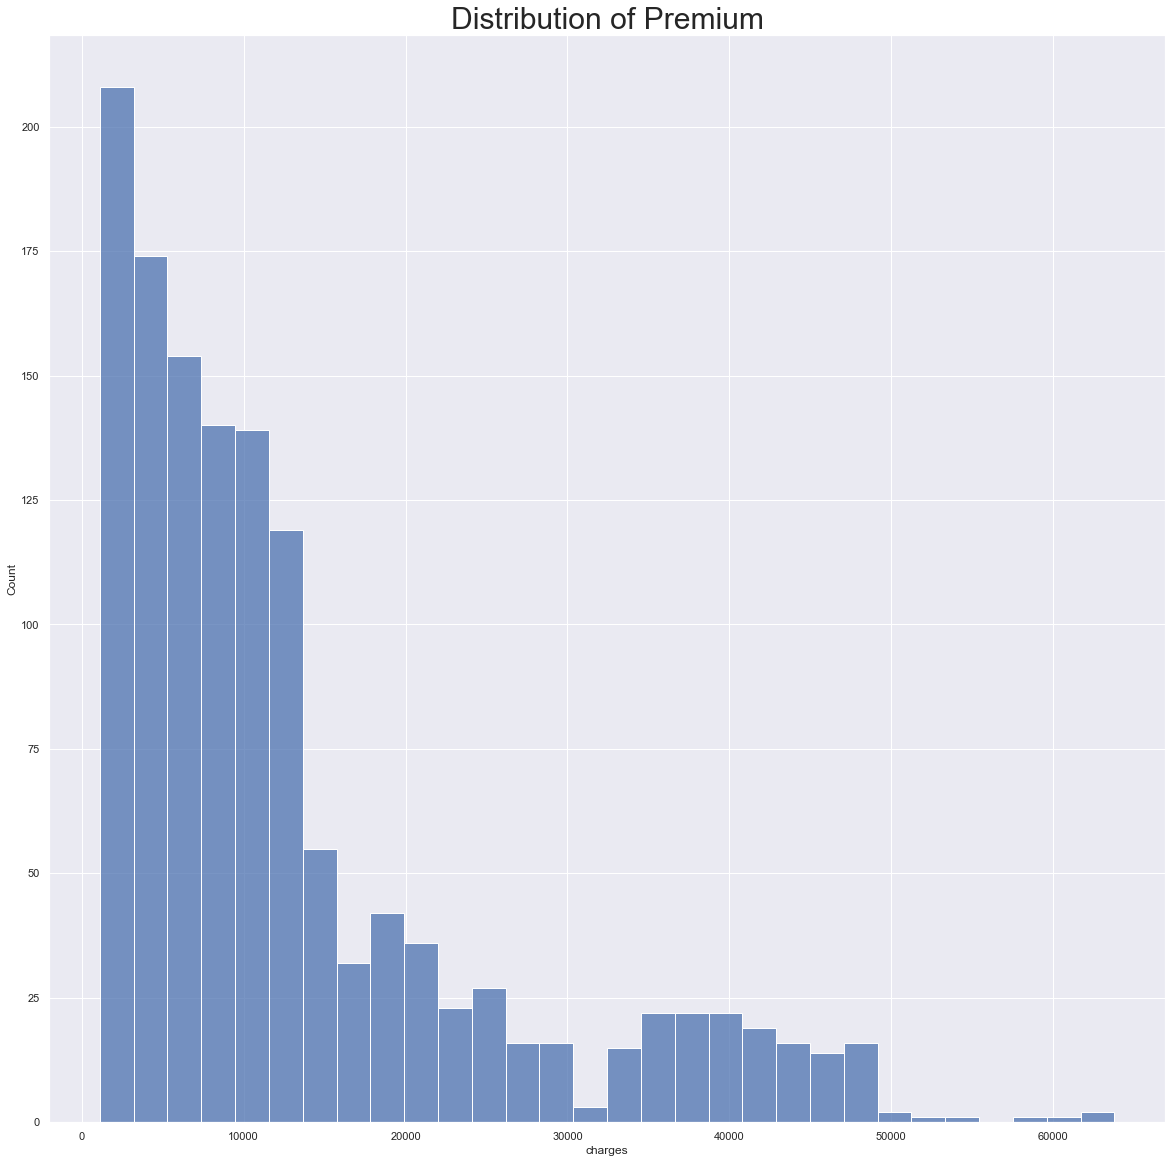

In [35]:
##Checking the distribution of the target variable

sns.histplot(data=df, x='charges')
sns.set_style('darkgrid')
rcParams['figure.figsize'] = 20,20;
plt.title('Distribution of Premium', fontdict={'fontsize':30} )
plt.plot();


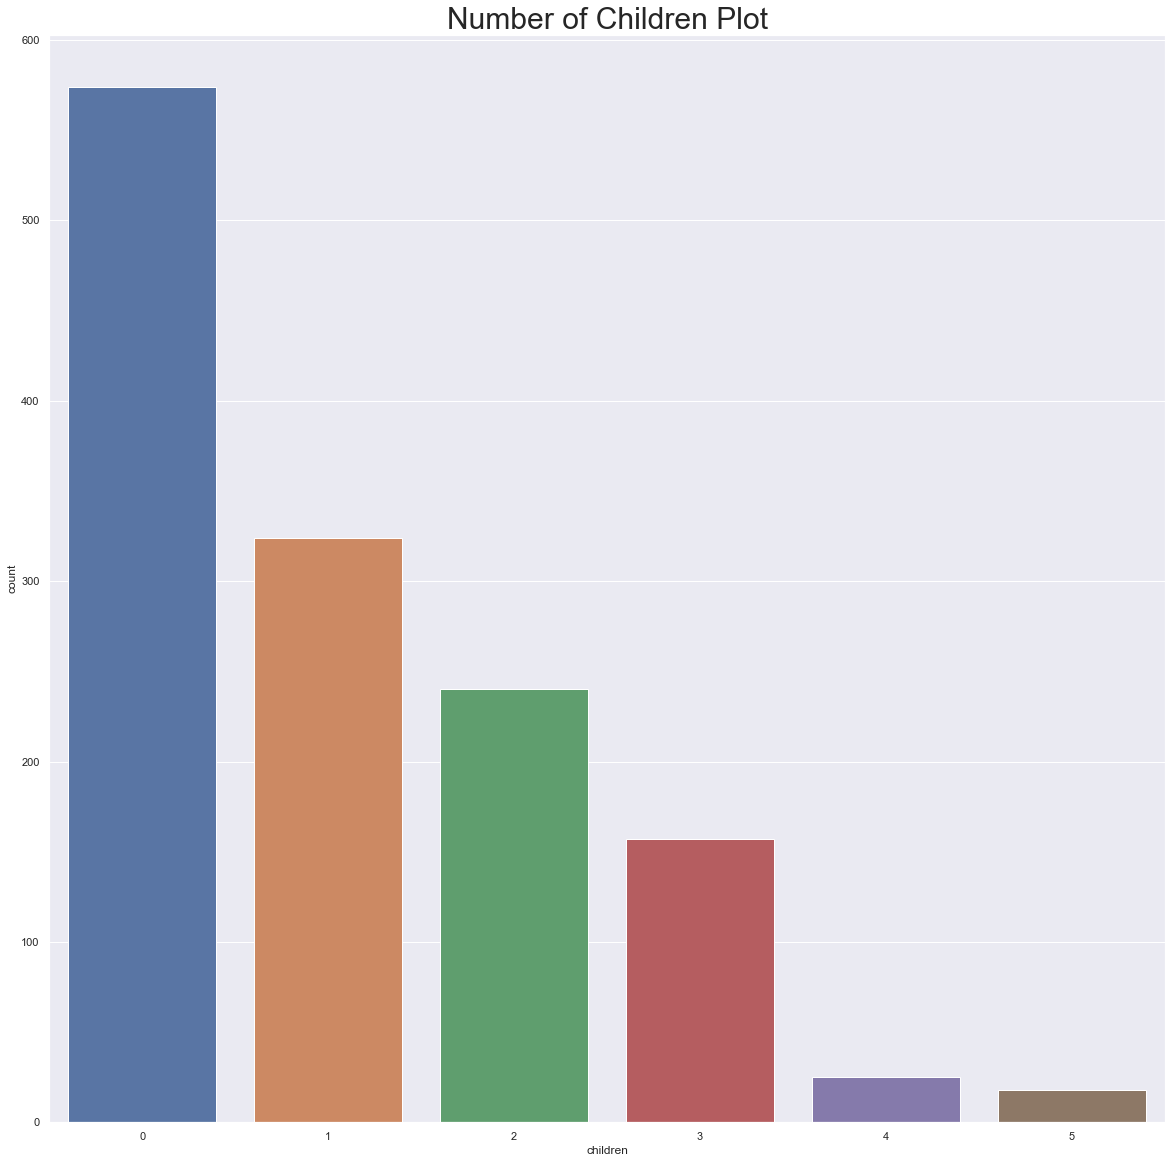

In [36]:
#Number of children category


sns.countplot(data=df, x='children')
plt.title('Number of Children Plot',fontdict={'fontsize':30} );

## Data Encoding

In [42]:
# Checking for columns with categories
df.select_dtypes('object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [45]:
print(df.sex.value_counts())
print('-------------------')
print(df.smoker.value_counts())
print('-------------------')
print(df.region.value_counts())

male      676
female    662
Name: sex, dtype: int64
-------------------
no     1064
yes     274
Name: smoker, dtype: int64
-------------------
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [96]:
print(df.region.value_counts())

2    364
3    325
1    325
0    324
Name: region, dtype: int64


In [51]:
#encoding the categories
le=LabelEncoder()
df['sex']= le.fit_transform(df['sex'])
df['smoker']= le.fit_transform(df['smoker'])
df['region']= le.fit_transform(df['region'])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Independent and Dependent Variable Split

In [54]:
X= df.drop('charges',axis=1)
y= df['charges']
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


## Train Test Split

In [55]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(936, 6)
(402, 6)
(936,)
(402,)


In [59]:
## Feature Selection
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


## Model Selection

In [63]:
#Trying out different models to select one
models=[LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]

for model in models:
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    Accuracy=r2_score(y_test,ypred)
    
    print(model,':', Accuracy)
    print('-----------')

LinearRegression() : 0.7911113876316933
-----------
DecisionTreeRegressor() : 0.7291383865872896
-----------
RandomForestRegressor() : 0.8565823920286016
-----------


In [ ]:
RandomForestRegressor()

## Hyperparameter Tuning for RandomForest

In [66]:

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [76]:
gridsearch=GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid,cv=5,scoring='r2')

# Fit the grid search to the data
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='r2')

In [77]:
gridsearch.best_score_

0.8378314952695508

In [78]:
gridsearch.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 150}

In [82]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred= rf.predict(X_test)
r2_score(y_test,y_pred)

0.8581966805018603

## Pickling the Model

In [87]:
import pickle
pickle.dump(rf, open('model.pkl','wb'))

In [88]:
X_test.head()

,age,sex,bmi,children,smoker,region
578,52,1,30.200,1,0,3
610,47,0,29.370,1,0,2
569,48,1,40.565,2,1,1
1034,61,1,38.380,0,0,1
198,51,0,18.050,0,0,1


## Testing the Pickled Model

In [93]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
prediction = model.predict(np.array([60, 1, 60.05, 4, 1, 2]).reshape(1, -1))
print(prediction)

[56086.3898607]


C:\Users\XPS 13 9305\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

